<a href="https://colab.research.google.com/github/jiansim03/AIFFEL_ONLINE_QUEST/blob/main/Exploration06/StableDiffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Diffusion 모델로 이미지 생성하기
---

## 모델 준비하기
---
- `Diffusers`는 이미지, 오디오, 3D 분자 구조를 생성하는 모델로, 파이프라인(Autoencoder, Conditional Unet, CLIP text encoder 등), 스케쥴러(속도와 결과물의 품질 조정), 사전학습된 모델로 구성

In [1]:
# Diffusers 설치하기
!pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.1 MB/s eta 0:00:00


## Text-to-Image Generation
---
- `Text-to-Image Generation` : Stable Diffusion의 가장 기본적인 기능. 텍스트를 입력하면 이미지를 생성

In [2]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler

device = "cuda"

# 파이프라인 불러오기
repo_id = "stabilityai/stable-diffusion-2-base"
pipe = DiffusionPipeline.from_pretrained(repo_id, torch_dtype=torch.float16, revision="fp16")

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:270: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2-base via `revision='fp16'`. This behavior is deprecated and will be removed in diffusers v1. One should use `variant='fp16'` instead. However, it appears that stabilityai/stable-diffusion-2-base currently does not have the required variant filenames in the 'main' branch. 
 The Diffusers team and community would be very grateful if you could open an issue: https://github.com/huggingface/diffusers/issues/new with the title 'stabilityai/stable-diffusion-2-base is missing fp16 files' so that the correct variant file can be added.
  warnings.warn(
unet/diffusion_pytorch_model.safetensors not found


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

## 하나의 이미지 생성하기
---
파이프라인이 준비되었다면 이제부터는 정말 쉽습니다. 원하는 이미지를 생성하기 위한 프롬프트(prompt)만 잘 입력해주면 되니까요!
여러분들이 원하는 이미지를 영어로 입력해 주세요.

- height, width: 생성될 이미지의 가로와 세로 픽셀 크기를 조절할 수 있습니다. 8의 배수로 설정해 주세요.
- num_inference_steps: denoising 스텝 수로, 값이 커질수록 고해상도 이미지가 출력되지만 출력되는 시간이 오래 걸립니다. default 값은 50입니다.
- guidance_scale: 얼마나 주어진 프롬프트에 근접한 이미지를 생성할지를 설정하는 하이퍼파라미터로, 값이 커질수록 문자열에 근접한 이미지가 생성되지만 이미지 품질이 떨어질 수 있습니다. default는 7.5입니다.





In [3]:
prompt = str(input('prompt: '))  # 프롬프트를 영어로 입력해보세요

prompt: Cat, sitting contemplatively, windowsill, cozy indoor setting, soft afternoon lighting, reminiscent of Carl Larsson’s watercolors, detailed, delicate strokes, realistic portrayal, warm and cool color palette, high resolution, intricate texture on fur and surroundings, subtle shadows, clear focus on subject, ambient, serene atmosphere, harmonious composition.


In [6]:
!pwd

/content


  0%|          | 0/25 [00:00<?, ?it/s]

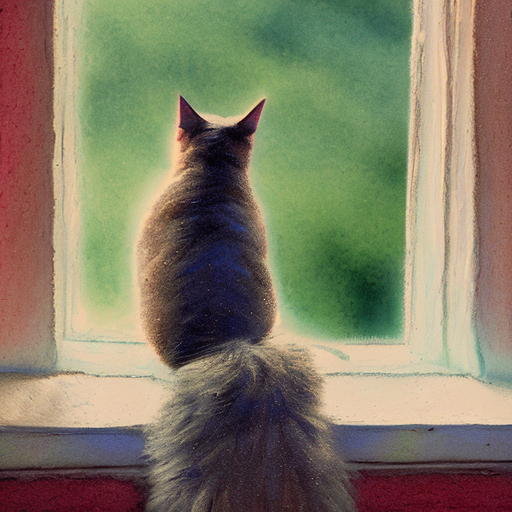

In [14]:
# 이미지 저장 폴더 만들기
import os
# os.mkdir("diffuser")    # diffusers 폴더를 이미 만들었다면 주석 처리해 주세요.

# 입력한 프롬프트를 사용하여 이미지 생성
image = pipe(prompt, num_inference_steps=25).images[0]

# 이미지 저장
image.save("diffuser/image.png")

# 이미지 출력
image

In [ ]:
# Cat, sitting contemplatively, windowsill, cozy indoor setting, soft afternoon lighting, reminiscent of Carl Larsson’s watercolors, detailed, delicate strokes, realistic portrayal, warm and cool color palette, high resolution, intricate texture on fur and surroundings, subtle shadows, clear focus on subject, ambient, serene atmosphere, harmonious composition.

In [ ]:
prompt = str(input('prompt: '))  # 프롬프트를 영어로 입력해보세요

In [ ]:
# 입력한 프롬프트를 사용하여 이미지 생성
image1 = pipe(prompt, num_inference_steps=20, guidance_scale=9).images[0]

# 이미지 저장
image1.save("diffuser/image_1.png")

# 이미지 출력
image1

## 여러 개의 이미지 생성하기
---
이번에는 하나의 프롬프트로 여러 개의 이미지를 생성해 봅시다.  
이미지 처리를 해주는 파이썬 라이브러리인 pillow를 사용하여 여러 개의 이미지를 담을 틀을 먼저 만들어 줍니다.

주의할 점은 이미지의 개수는 이미지를 담을 틀의 개수와 동일해야 한다는 것이에요. assert len(imgs) == rows * cols라는 코드에서 볼 수 있듯이, 출력하고 싶은 이미지의 개수가 6개라면 행과 열은 2와 3으로 설정해 주어야 해요. 3과 2, 1과 6도 가능하겠죠?

In [15]:
# 파이썬 이미지 처리 라이브러리 pillow 불러오기
from PIL import Image

# 틀 만들기
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box = (i%cols * w, i // cols * h))
    return grid

In [16]:
torch.cuda.empty_cache()

  0%|          | 0/5 [00:00<?, ?it/s]

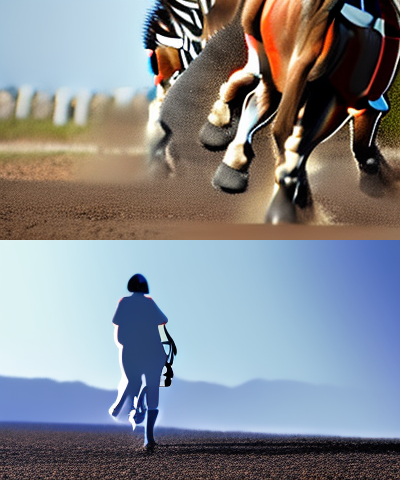

In [17]:
# 이미지의 개수
num_images = 2

# 프롬프트 입력
prompt = ['a horse riding a person'] * num_images

# 이미지 생성
images = pipe(prompt, height=240, width=400, num_inference_steps=5, guidance_scale=9).images

# 이미지 출력
grid = image_grid(images, rows= 2, cols= 1)
grid

## Image-to-Image Generation
---
Image-to-Image Generation은 프롬프트뿐 아니라 이미지를 입력으로 넣으면 다른 이미지로 변형시켜 주는 기능입니다

- seed: 동일한 입력 문장과 각종 설정을 넣었을 때 동일한 시드 값을 주면 같은 이미지를 생성할 수 있습니다.
- strength: 레퍼런스 이미지에서 얼마나 변형할지를 설정하는 하이퍼파라미터로, 값이 커질수록 원본 이미지와 다른 이미지를 생성합니다. 0과 1 사이의 값을 선택할 수 있으며, default는 0.8입니다.
- guidance_scale: 얼마나 주어진 프롬프트에 근접한 이미지를 생성할지를 설정하는 하이퍼파라미터로, 값이 커질수록 문자열에 근접한 이미지가 생성되지만 이미지 품질이 떨어질 수 있습니다. default는 7.5입니다.
- num_inference_steps: denoising 스텝 수로, 값이 커질수록 고해상도 이미지가 출력되지만 출력되는 시간이 오래 걸립니다.





In [18]:
# Image-to-Image Generation 파이프라인 불러오기
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_path = "CompVis/stable-diffusion-v1-4"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
)
pipe = pipe.to(device)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


### 하나의 이미지 생성하기
---
사용할 이미지를 불러옵시다.
이미지를 클라우드에 올려서 사용해도 되고, 아래의 코드와 같이 인터넷에 있는 이미지를 가져와도 좋습니다. 여기서는 허깅페이스에서 제공하는 기본 이미지를 사용해 볼게요.

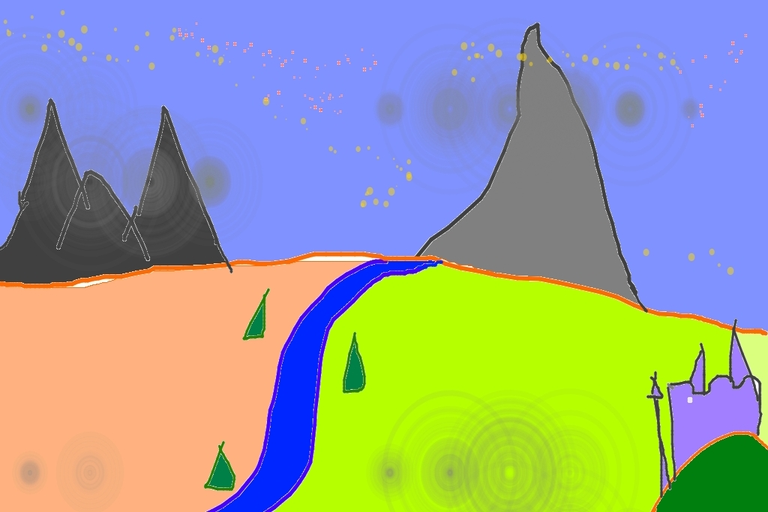

In [19]:
import requests
from io import BytesIO

url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

# url 호출하기
response = requests.get(url)

# 이미지 열기
init_img = Image.open(BytesIO(response.content)).convert("RGB")  # 이미지를 메모리로 읽어와서 RGB로 변경합니다.
init_img = init_img.resize((768, 512))  # 이미지의 크기를 조절합니다.
init_img

In [20]:
prompt = "A fantasy landscape, trending on artstation"

  0%|          | 0/37 [00:00<?, ?it/s]

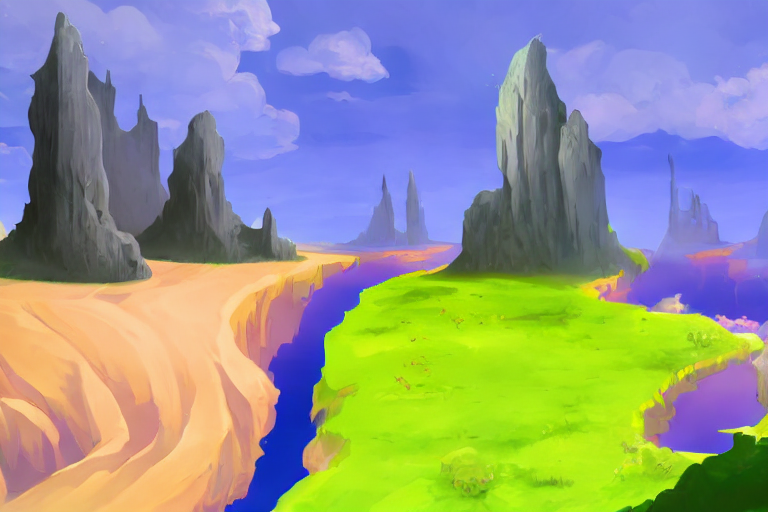

In [22]:
generator = torch.Generator(device=device).manual_seed(1024)   # 모델을 사용할 때마다 동일한 이미지를 생성하기 위해 seed를 설정합니다.

images = pipe(prompt=prompt, image=init_img, strength=0.75, guidance_scale=7.5).images
images[0].save("diffuser/fantasy_landscape.png")
images[0]

## 여러 개의 이미지 생성하기
---
여러 개의 프롬프트를 사용하여 여러 장의 이미지를 한번에 생성할 수도 있습니다.  
Text-to-Image Generation에서 사용했던 코드를 사용하였으니 코드를 자유롭게 변경해 보세요.

In [23]:
# GPU 메모리를 지우는 코드입니다.
torch.cuda.empty_cache()

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_img2img.py:564: FutureWarning: You have passed 2 text prompts (`prompt`), but only 1 initial images (`image`). Initial images are now duplicating to match the number of text prompts. Note that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update your script to pass as many initial images as text prompts to suppress this warning.
  deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/22 [00:00<?, ?it/s]

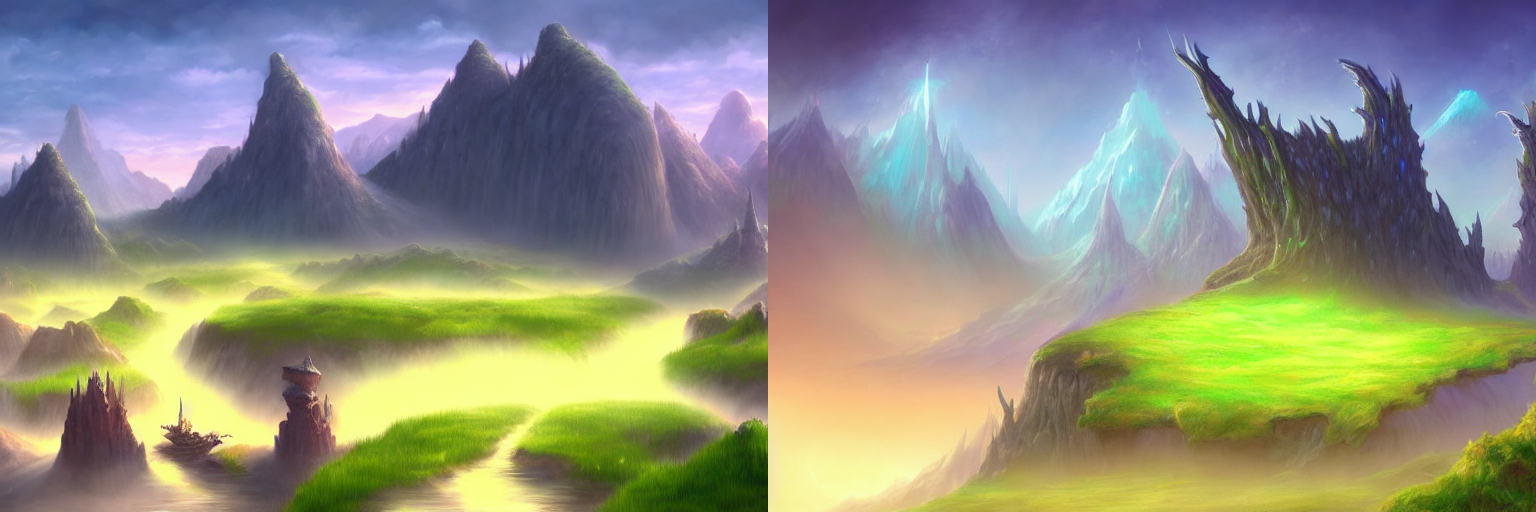

In [25]:
num_images = 2

# 프롬프트 입력
prompt = ['A fantasy landscape, trending on artstation'] * num_images

# 이미지 생성
generator = torch.Generator(device=device).manual_seed(1024)
images = pipe(prompt=prompt, image=init_img, strength=0.9, guidance_scale=13.5, num_inference_steps=25, generator=generator).images
images

# 이미지 출력
grid = image_grid(images, rows=1, cols=2)
grid